******************
random0.bmp
Rm:0.88232421875
Rm_:0.874755859375
Sm:0.096923828125
Sm_:0.102783203125
******************
random1.bmp
Rm:0.8349609375
Rm_:0.890380859375
Sm:0.135498046875
Sm_:0.09619140625
******************
random2.bmp
Rm:0.820068359375
Rm_:0.89306640625
Sm:0.154541015625
Sm_:0.091064453125
******************
random3.bmp
Rm:0.776123046875
Rm_:0.896484375
Sm:0.191650390625
Sm_:0.087646484375
******************
random4.bmp
Rm:0.744873046875
Rm_:0.900390625
Sm:0.221923828125
Sm_:0.0869140625
******************
random5.bmp
Rm:0.672607421875
Rm_:0.901611328125
Sm:0.282470703125
Sm_:0.08203125
******************
random6.bmp
Rm:0.608642578125
Rm_:0.9091796875
Sm:0.345703125
Sm_:0.075927734375
******************
random7.bmp
Rm:0.516845703125
Rm_:0.908203125
Sm:0.424560546875
Sm_:0.08154296875
******************
random8.bmp
Rm:0.479248046875
Rm_:0.9140625
Sm:0.47021484375
Sm_:0.074951171875


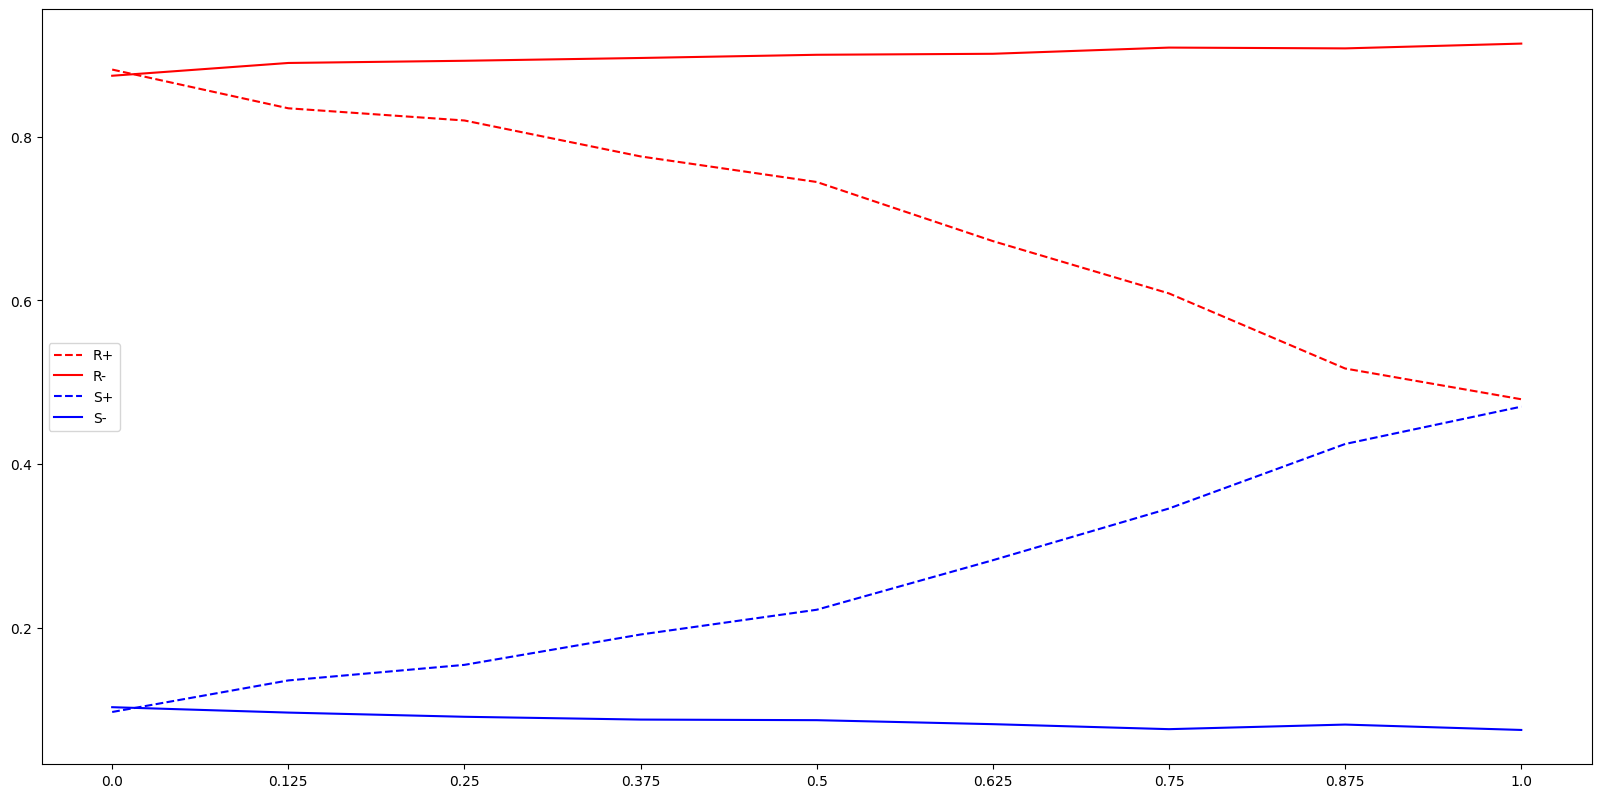

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
from random import random
from secrets import randbits
from PIL import Image
import re


#source:一个字节,target:一比特,将source的最低位替换为target
#非负翻转
def ReplaceLastBit(source, target):
    reg = re.compile(r'[0|1]$')
    return reg.sub(target, source)


#将string转化为二进制字符串
def StringtoBit(string):
    return ''.join(bin(ord(c)).replace('0b', '').rjust(8, '0') for c in string)


# 将二进制字符串bitstr转换为字符串
def BittoString(bitstr):
    if (len(bitstr) % 8 != 0):
        print("Invail bit string!")
        exit(0)
    i = len(bitstr) // 8
    return ''.join(
        chr(int(bitstr[8 * j:8 * (j + 1)], 2)
            ) if int(bitstr[8 * j:8 *
                            (j + 1)], 2) in range(ord('A'), ord('Z'))
        or int(bitstr[8 * j:8 * (j + 1)], 2) in range(ord('a'), ord('z'))
        or int(bitstr[8 * j:8 *
                      (j + 1)], 2) in range(ord('0'), ord('9')) else ''
        for j in range(i))


def encode(path, new_path, data):
    im = Image.open(path)
    data = StringtoBit(data)
    width = im.size[0]
    height = im.size[1]
    if (width * height < len(data)):
        print("Your string is too long!")
        return False
    count = 0
    for w in range(width):  # 纵向嵌入
        for h in range(height):
            pixel = im.getpixel((w, h))
            R_byte = pixel[0]
            G_byte = pixel[1]
            B_byte = pixel[2]
            R_bit = bin(R_byte).replace('0b', '')
            R_bit = ReplaceLastBit(R_bit, data[count])
            im.putpixel((w, h), (int(R_bit, 2), G_byte, B_byte))
            count += 1
            if (count >= len(data)):  #已经嵌入所有信息
                im.save(new_path)
                return True
    im.save(new_path)
    return True


# random_rate:随机率，每八个bit中随机比特的个数
# 除了随机的比特，其它比特都为1
def encode_random(path, new_path, random_rate):
    im = Image.open(path)
    width = im.size[0]
    height = im.size[1]
    data = ''
    for i in range(0, width * height, 8):
        for ii in range(i, i + random_rate):
            data += '0' if random() > 0.5 else '1'
        for ii in range(i + random_rate, i + 8):
            data += '1'
    count = 0
    for w in range(width):  # 纵向嵌入
        for h in range(height):
            pixel = im.getpixel((w, h))
            R_byte = pixel[0]
            G_byte = pixel[1]
            B_byte = pixel[2]
            if (R_byte % 2 == 0):
                if (data[count] == '1'):
                    R_byte += 1
            else:
                if (data[count] == '0'):
                    R_byte -= 1
            im.putpixel((w, h), (R_byte, G_byte, B_byte))
            count += 1
    im.save(new_path)
    return True


# random_rate:随机率，嵌入秘密信息的像素数目所占比例
# 除了随机的比特，其它比特都为1
def encode_random_2(path, new_path, random_rate):
    im = Image.open(path)
    width = im.size[0]
    height = im.size[1]
    max_len = width * height * random_rate
    data = ''
    for i in range(0, max_len):
        data += '0' if random() > 0.5 else '1'
    count = 0
    for w in range(width):  # 纵向嵌入
        for h in range(height):
            pixel = im.getpixel((w, h))
            R_byte = pixel[0]
            G_byte = pixel[1]
            B_byte = pixel[2]
            if (R_byte % 2 == 0):
                if (data[count] == '1'):
                    R_byte += 1
            else:
                if (data[count] == '0'):
                    R_byte -= 1
            im.putpixel((w, h), (R_byte, G_byte, B_byte))
            count += 1
            if (count > max_len):
                im.save(new_path)
                return True
    im.save(new_path)
    return True


def decode(path):
    im = Image.open(path)
    width = im.size[0]
    height = im.size[1]

    data = ''.join(
        bin(im.getpixel((w, h))[0])[-1] for w in range(width)
        for h in range(height))
    print(BittoString(data))


# 非负翻转
def Non_negative_evert(im_old):
    im = Image.new(mode="RGB", size=[im_old.size[0], im_old.size[1]])
    width = im_old.size[0]
    height = im_old.size[1]
    for w in range(width):
        for h in range(height):
            pixel = im_old.getpixel((w, h))
            R_byte = pixel[0]
            G_byte = pixel[1]
            B_byte = pixel[2]
            rand_bit = 0 if random() > 0.5 else 1
            if (R_byte % 2 == 0):
                if (rand_bit == 1):
                    R_byte += 1
            else:
                if (rand_bit == 0):
                    R_byte -= 1
            im.putpixel((w, h), (R_byte, G_byte, B_byte))
    return im


# 非正翻转
def Non_positive_evert(im_old):
    im = Image.new(mode="RGB", size=[im_old.size[0], im_old.size[1]])
    width = im_old.size[0]
    height = im_old.size[1]
    for w in range(width):
        for h in range(height):
            pixel = im_old.getpixel((w, h))
            R_byte = pixel[0]
            G_byte = pixel[1]
            B_byte = pixel[2]
            rand_bit = 0 if random() > 0.5 else 1
            if (R_byte % 2 == 0):
                if (rand_bit == 1):
                    R_byte = (R_byte - 1) if R_byte != 0 else 0  #TODO
            else:
                if (rand_bit == 0):
                    R_byte += 1
            im.putpixel((w, h), (R_byte, G_byte, B_byte))
    return im


# 计算一个图像块的起伏程度
def Correlation(data):
    list = Zigzag(data)
    sum = 0
    for i in range(len(list) - 1):
        sum += abs(list[i + 1] - list[i])
    return sum


# 将一个图像块按Z形输出
def Zigzag(data):
    row = len(data)
    col = len(data[0])
    i = 0
    j = 0
    k = 0
    num = row * col
    list = []
    while i < row and j < col and k < num:
        list += [data[i][j]]
        k += 1
        if ((i + j) % 2 == 0):  #右上移动
            if ((i - 1) not in range(row)
                    and (j + 1) in range(col)):  # 超出上边界，向右移动
                j += 1
            elif ((i - 1) in range(row)
                  and (j + 1) not in range(col)):  # 超出右边界，向下移动
                i += 1
            elif ((i - 1) not in range(row)
                  and (j + 1) not in range(col)):  # 处于右上顶点，向下移动
                i += 1
            else:
                i -= 1
                j += 1
        else:  # 左下移动
            if ((i + 1) not in range(row)
                    and (j - 1) in range(col)):  # 超出下边界，向右移动
                j += 1
            elif ((i + 1) in range(row)
                  and (j - 1) not in range(col)):  # 超出左边界，向下移动
                i += 1
            elif ((i + 1) not in range(row)
                  and (j - 1) not in range(col)):  # 左下顶点，向右移动
                j += 1
            else:
                i += 1
                j -= 1
    return list


# 计算所有图像块的像素起伏程度
def Correlation_list(im):
    width = im.size[0] // 8
    height = im.size[1] // 8
    correlation_list = []
    for i in range(width):
        for j in range(height):
            data = [[], [], [], [], [], [], [], []]
            for jj in range(8):
                for ii in range(8):
                    data[ii] += [im.getpixel((8 * i + ii, 8 * j + jj))[0]]
            correlation_list += [Correlation(data)]
    return correlation_list


def RS(im):
    width = im.size[0] // 8
    height = im.size[1] // 8
    num = width * height  # 图像块数目
    init_correlation_list = Correlation_list(im)  # 初始图像块的像素起伏程度
    im_after_non_neg_evert = Non_negative_evert(im)
    im_after_non_pos_evert = Non_positive_evert(im)
    non_neg_correlation_list = Correlation_list(im_after_non_neg_evert)
    non_pos_correlation_list = Correlation_list(im_after_non_pos_evert)
    count_non_neg_R = 0  # 非负翻转后起伏程度增加的图像块数目
    count_non_pos_R = 0  # 非正翻转后起伏程度增加的图像块数目
    count_non_neg_S = 0  # 非负翻转后起伏程度减少的图像块数目
    count_non_pos_S = 0  #非增翻转后起伏程度减少的图像块数目
    for i in range(len(init_correlation_list)):
        if non_neg_correlation_list[i] > init_correlation_list[i]:
            count_non_neg_R += 1
        elif non_neg_correlation_list[i] < init_correlation_list[i]:
            count_non_neg_S += 1
        if non_pos_correlation_list[i] > init_correlation_list[i]:
            count_non_pos_R += 1
        elif non_pos_correlation_list[i] < init_correlation_list[i]:
            count_non_pos_S += 1
    Rm = count_non_neg_R / num
    Rm_ = count_non_pos_R / num
    Sm = count_non_neg_S / num
    Sm_ = count_non_pos_S / num
    print("Rm:" + str(Rm))
    print("Rm_:" + str(Rm_))
    print("Sm:" + str(Sm))
    print("Sm_:" + str(Sm_))
    return Rm, Rm_, Sm, Sm_


def LSB():
    path = input("Input the path of image:")
    while (os.path.exists(path) == False):
        path = input(path + " does not exists , please input again:")
    new_path = input("Input save path:")
    data = input("Input message to insert:")
    #file = open("txt", "r")
    #data = file.read()
    while (encode(path, new_path, data) == False):
        data = input("Input message:")
    print("New image saved to:" + new_path)
    print("Decode :")
    decode(new_path)


def LSB_random():
    path = "raw.bmp"
    random_rate = int(input("Input random rate:(0-8)"))
    while (random_rate not in range(0, 9)):
        random_rate = input("Invail,input again:(0-8)")
    new_path = "random" + str(random_rate) + ".bmp"
    encode_random(path, new_path, random_rate)


def LSB_random_2():
    path = "1.bmp"
    random_rate = int(input("Input random rate:(0-8)"))
    while (random_rate not in range(0, 9)):
        random_rate = input("Invail,input again:(0-8)")
    new_path = "random_" + str(random_rate) + ".bmp"
    encode_random_2(path, new_path, random_rate)


def _RS_():
    path1 = input("RS Analyze\nInput path1:")
    while (os.path.exists(path1) == False):
        path1 = input(path1 + " does not exists , please input again:")
    path2 = input("Input path2:")
    while (os.path.exists(path2) == False):
        path2 = input(path2 + " does not exists , please input again:")
    im = Image.open(path1)
    print("Image1:")
    RS(im)
    print("Image2:")
    im2 = Image.open(path2)
    RS(im2)


def RS_show():
    Rm = []
    Rm_ = []
    Sm = []
    Sm_ = []
    for i in range(0, 9):
        path = 'random' + str(i) + '.bmp'
        print("******************\n" + path)
        rm, rm_, sm, sm_ = RS(Image.open(path))
        Rm += [rm]
        Rm_ += [rm_]
        Sm += [sm]
        Sm_ += [sm_]
    random_list = []
    for i in range(0, 9):
        random_list += [str(i / 8)[0:5]]
    plt.figure(figsize=(20, 10), dpi=100)
    plt.plot(random_list, Rm, c='red', linestyle='--', label='R+')
    plt.plot(random_list, Rm_, c='red', label='R-')
    plt.plot(random_list, Sm, c='blue', linestyle='--', label='S+')
    plt.plot(random_list, Sm_, c='blue', label='S-')
    plt.legend(loc='best')
    plt.show()




if __name__ == "__main__":
    #file = open("txt", "w")
    #for i in range(512 * 512 // 8):
    #    file.write('~')
    #file.close()
    #LSB()  #用户输入秘密信息
    #while (True):
    #LSB_random()  #第一种方式的随机嵌入
    #LSB_random_2()  #第二种方式的随机嵌入
    #_RS_()  #比较两张图像的Rm
    RS_show()  #使用随机嵌入的图像